In [1]:
#Useful Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Reading data from csv file
data = pd.read_csv('/Users/HessaAlrasheed/Desktop/country_vaccinations.csv')

In [3]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [4]:
#Find the shape of data
data.shape

(61612, 15)

Data Preprocessing

In [5]:
#Delete unnecessary columns
data.drop(['source_name', 'source_website','vaccines'], axis='columns', inplace=True)

In [6]:
#Check if there are miss values in the data
data.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     28488
people_vaccinated                      30080
people_fully_vaccinated                32889
daily_vaccinations_raw                 34462
daily_vaccinations                       340
total_vaccinations_per_hundred         28488
people_vaccinated_per_hundred          30080
people_fully_vaccinated_per_hundred    32889
daily_vaccinations_per_million           340
vaccines                                   0
dtype: int64

In [7]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
dtype: object

In [8]:
#Delete null value in people_vaccinated & total_vaccinations columns
data = data.drop(data[data.people_vaccinated.isna()].index)
data = data.drop(data[data.total_vaccinations.isna()].index)

In [9]:
data.head ()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.30,0.30,NaN,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.60,0.60,NaN,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [10]:
#Conver date column datatype to date
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')

In [11]:
#Find total vaccinations for each country
data["Total vaccinations in count"]= data.groupby("country").total_vaccinations.tail(1)

In [12]:
#Find the average of vaccinations for each country 
data.groupby("country")["Total vaccinations in count"].mean()

country
Afghanistan           5116767.0
Albania               2111797.0
Algeria              12076870.0
Andorra                104534.0
Angola                9847459.0
                        ...    
Wales                 5653821.0
Wallis and Futuna       11939.0
Yemen                  774953.0
Zambia                 985443.0
Zimbabwe              6640440.0
Name: Total vaccinations in count, Length: 223, dtype: float64

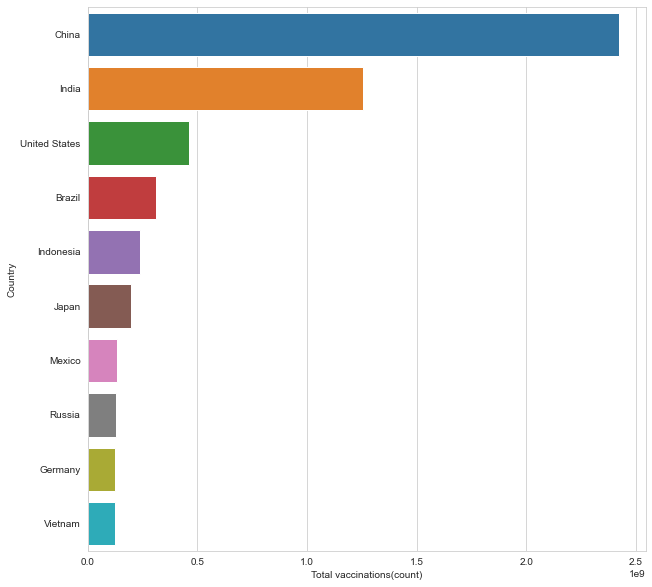

In [16]:
#Find top countries with got vaccinations
x= data.groupby("country")["Total vaccinations in count"].mean().sort_values(ascending= False).head(10)
sns.set_style("whitegrid")
plt.figure(figsize= (10,10))
ax=sns.barplot(x=x.values, y=x.index)
ax.set_xlabel("Total vaccinations(count)")
ax.set_ylabel("Country")
plt.show()

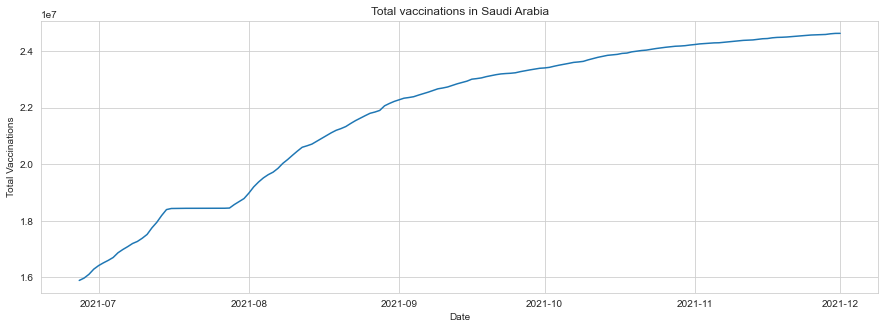

In [17]:
#Total vaccinations in Saudi
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Total vaccinations in Saudi Arabia")
sns.lineplot(x= "date",y= "people_vaccinated",data= data[data["country"]=="Saudi Arabia"])
plt.show()

In [ ]:
#People vaccinated vs people fully vaccinated in Saudi Arabia
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("People vaccinated vs people fully vaccinated in Saudi Arabia")
sns.lineplot(x= "date",y= "people_vaccinated",data= data[data["country"]=="Saudi Arabia"])
sns.lineplot(x= "date",y= "people_fully_vaccinated",data= data[data["country"]=="Saudi Arabia"])
plt.show()

In [86]:
#Creating basic model for Saudi Arbia country
new_dataset = data[['total_vaccinations','country']]
new_dataset = new_dataset.loc[new_dataset['country'] == "Saudi Arabia"]
new_dataset['date_diff']=new_dataset['total_vaccinations']
count=0
for index, row in data.iterrows():
    row['date_diff']=count
    count+=1

In [87]:
#creating model
model=LinearRegression()

In [89]:
#Create our x and Y variable
x=new_dataset[['date_diff']]
y=new_dataset['total_vaccinations']
model.fit(x,y)

LinearRegression()

In [90]:
print(model.coef_)
print(model.intercept_)

[1.]
-1.4901161193847656e-08


In [91]:
#lets predict after 1 year how many vaccines will be made i.e 365 days so our x value will be 365
pr=model.predict(x)

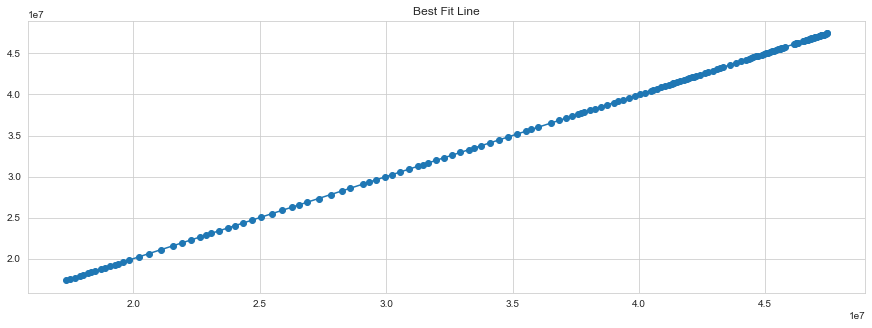

In [94]:
#lets visualize our total vaccination by day
fig,ax=plt.subplots(figsize=(15,5))
plt.title('Best Fit Line')
plt.scatter(x=new_dataset['date_diff'],y=new_dataset['total_vaccinations'])
plt.plot(x,pr)